# Uncertainty in cats

**Motivateion:** So, I got some great feedback from Max on what *types* of plots he's looking for, so I think it's now reasonable to follow-up on making them.

For ggF, we've (tentatively) settled on the 45 degree rotation for the training, but I think it's great to visualize some of these metrics rn :)

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

# useful functions from other nbs
from crypto_utils import *

import os
os.sys.path += ['../deta_cats/','../non-resonant-studies','../code/']
from statUtils import plotCorrelation

from lim_utils import *
from utils import *
from pull_imp_utils import *
from eventDisplays import rainbow_text


import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Using uproot4


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Load in the data**

J reminding myself of the 6 options on the table we have rn!

Looking into `../stats-results/quad45_2x2.py `


In [1]:
%%bash

cat ../stats-results/quad45_2x2.py

'''
Goal: We have some background estimates that we ~ trust which involve
1. Quadrants, rotating by 45 degrees
2. Training the years separately

We have some open Qs, so here I'm going to address the open items from my side,
all I need (rn) is to *make* the workspaces / pull since the limits can be
evaluated later :)

23 June 2021
'''

import os
import numpy as np
from subTimingStudies import writeSlurmFile
from var_bins_studies import get_bin_edgs

# The variable width binning function that James prefers
def res_bin_edges(lo, hi, res, to_nearest=1):

    def round_extra(x, base=5): return base*round(x/base)

    bins, edge = [lo], lo
    while edge < hi:
        edge = edge*(1 + res)
        bins.append(edge)

    bins = [round_extra(edge, to_nearest) for edge in bins ]

    return np.array(bins)

if __name__ == '__main__':

    SLURM_DIR = 'slurm_scripts'


    SDIR = "../../hh4b/hh4b-resolved-reconstruction"
    BDIR  = '../data/RR/cryptotuples/'

    ODIR = '../stats-results/Q45/'


In [9]:
BDIR  = '../data/RR/cryptotuples/'

B_RSEP    = [f"{BDIR}/splityr_bkt/data_baseline_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]
B_ROHE    = [f"{BDIR}/seanFixOHEyr_bkt/data_baseline_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]
B_QOHE    = [f"{BDIR}/quad_OHEyr_bkt/data_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]
B_QSEP    = [f"{BDIR}/quad_splityr_bkt/data_bl_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]
B_Q45     = [f"{BDIR}quad_45/data{yr}_Xhh_45_NN_100_bootstraps.root" for yr in [16,17,18]]
B_Q45_OHE = [f"{BDIR}quad_45_OHEyr/data{yr}_Xhh_45_NN_100_bootstraps.root" for yr in [16,17,18]]

R_Q45     = [f"{BDIR}rev_deta/quad_45/data_rev_deta_Xhh_45_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]
R_Q45_OHE = [f"{BDIR}rev_deta/quad_45_OHEyr/data_rev_deta_Xhh_45_{yr}_NN_100_bootstraps.root" for yr in [16,17,18]]

In [4]:
d_45 = load_df(B_Q45)

**Total uncertainty plot for our *new* baseline, quadrants w/ the 45 dgree tilt**

In [5]:
e_p05 = np.array([275, 289, 303, 318, 334, 351, 369, 387, 406, 426, 447, 469, 492, 
                  517, 543, 570, 598, 628, 659, 692, 727, 763, 801, 841, 883, 927, 
                  973, 1022, 1073])

var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']


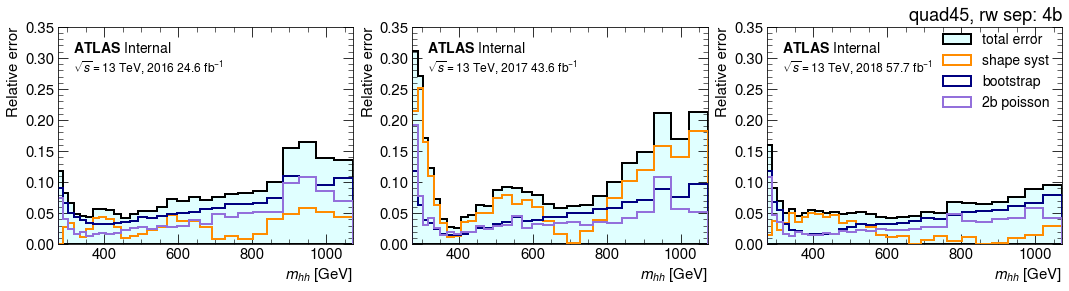

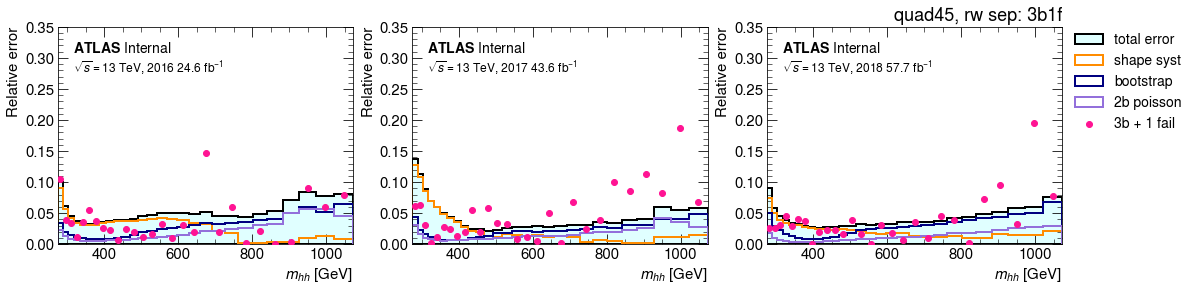

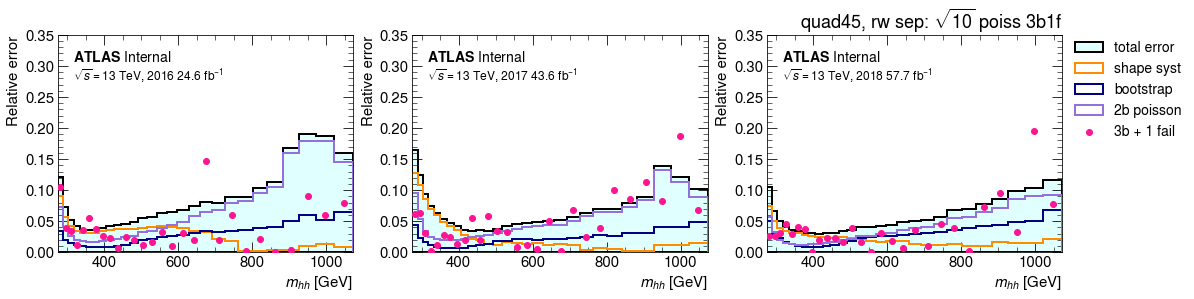

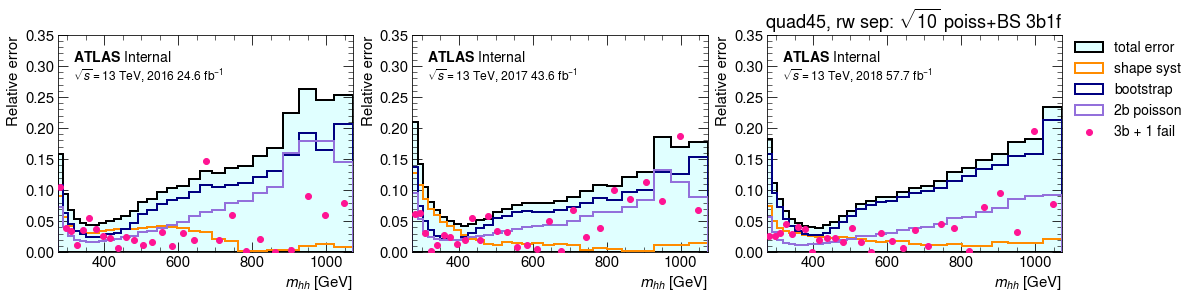

In [6]:
base = 'quad45, rw sep: '
k = 'Q45'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

if not os.path.exists(figDir):
    os.mkdir(figDir)

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(d_45,e_p05,'4b','total',True,title=title,figDir=figDir,label=label)

unc_by_yr(d_45,e_p05,'3b1f','total',True,title=base+'3b1f',figDir=figDir,label=label,scale='none')
unc_by_yr(d_45,e_p05,'3b1f','total',True,title=base+'$\sqrt{10}$ poiss 3b1f',
          figDir=figDir,label=label+'_sqrt10_poiss',scale='poiss')
unc_by_yr(d_45,e_p05,'3b1f','total',True,title=base+'$\sqrt{10}$ poiss+BS 3b1f',
          figDir=figDir,label=label+'_sqrt10_poiss_bs',scale='poiss_bs')


**The rev_deta_hh plot / file**

In [10]:
r_45 = load_df(R_Q45)

var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']
var =  HT
var =  ['m_h1', 'm_h2']


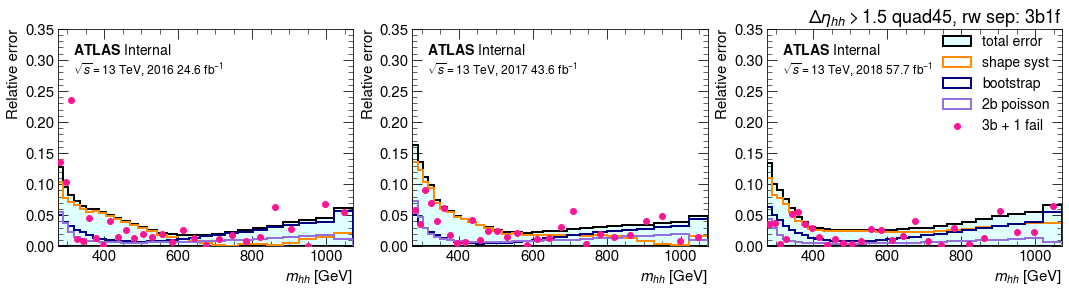

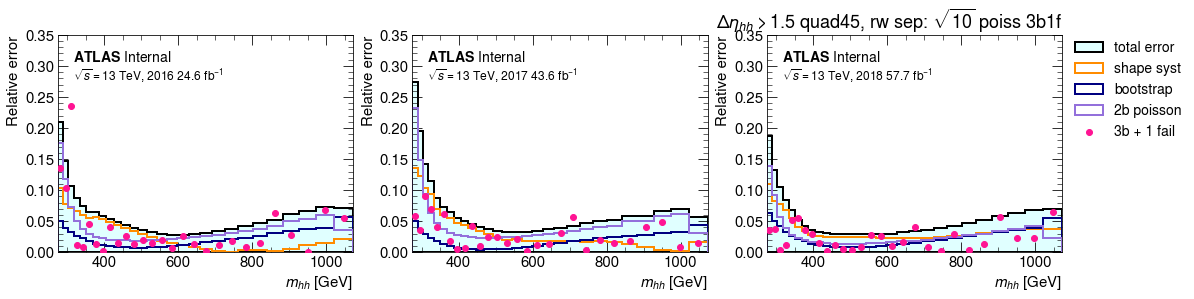

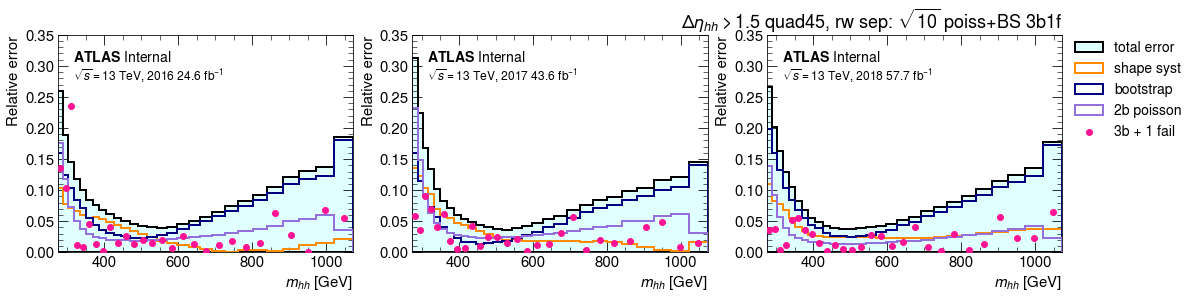

In [12]:
base = '$\Delta\eta_{hh} > 1.5$ quad45, rw sep: '
k = 'rev_deta_Q45'
figDir=f'figures/ggF_PUSH/NP_split/{k}'

if not os.path.exists(figDir):
    os.mkdir(figDir)

# 4b
title = base + '4b'
label='_res_p05'

unc_by_yr(r_45,e_p05,'4b','total',True,title=title,figDir=figDir,label=label)

unc_by_yr(r_45,e_p05,'3b1f','total',True,title=base+'3b1f',figDir=figDir,label=label,scale='none')
unc_by_yr(r_45,e_p05,'3b1f','total',True,title=base+'$\sqrt{10}$ poiss 3b1f',
          figDir=figDir,label=label+'_sqrt10_poiss',scale='poiss')
unc_by_yr(r_45,e_p05,'3b1f','total',True,title=base+'$\sqrt{10}$ poiss+BS 3b1f',
          figDir=figDir,label=label+'_sqrt10_poiss_bs',scale='poiss_bs')



**Set up a function to make the plot for the 2x2 cats**